### importing required libraries 

In [2]:

import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


In [3]:
path = "online_shoppers_intention.csv"
data = pd.read_csv(path)

# checking data structure

In [4]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
data.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [6]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [7]:
data.shape

(12330, 18)

In [8]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# checking for unique values

In [9]:
data.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [10]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [11]:
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# plotting a heatmap using seaborn

<Axes: >

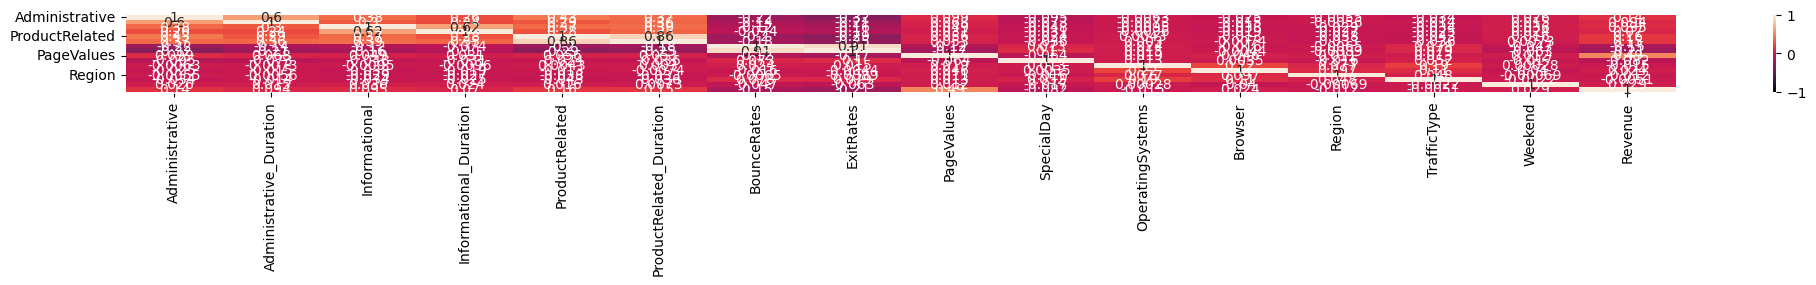

In [13]:
plt.figure(figsize = (25,1))
sns.heatmap(data.corr(),vmin = -1, vmax = 1, annot = True)

# plotting a countplot for revenue vs count

Text(0.5, 1.0, 'Revenue True vs False Count')

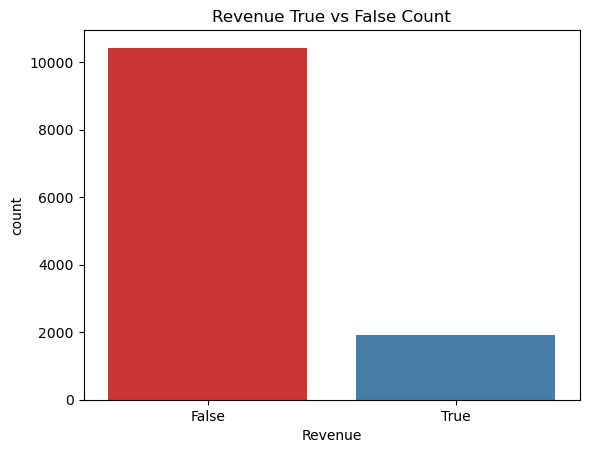

In [14]:
sns.countplot(x='Revenue', data=data, palette='Set1')
plt.title('Revenue True vs False Count')

Text(0.5, 1.0, 'Month Vs Revenue Count')

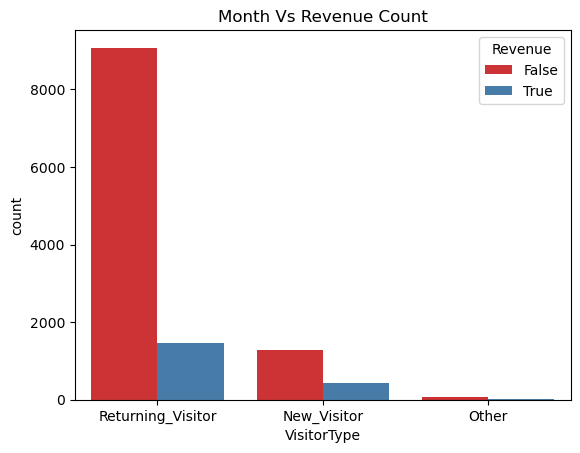

In [15]:

sns.countplot(x='VisitorType', data=data, palette='Set1',hue="Revenue")
plt.title('Month Vs Revenue Count')

Text(0.5, 1.0, 'Month Vs Revenue Count')

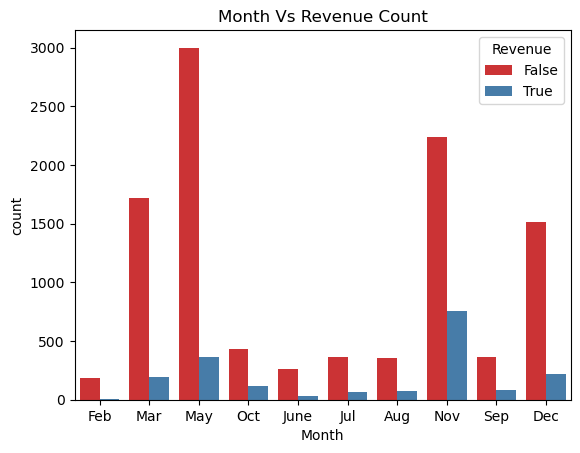

In [16]:
sns.countplot(x='Month', data=data, palette='Set1',hue="Revenue")
plt.title('Month Vs Revenue Count')

# plotting a scatterplot for duration vs product related 

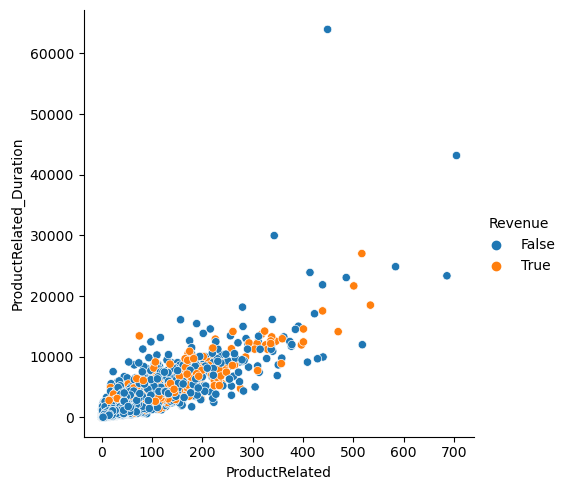

In [17]:
sns.relplot(data=data, x="ProductRelated", y="ProductRelated_Duration", hue="Revenue")

# Intiating training the model 

In [18]:

le = LabelEncoder()
data['Month'] = le.fit_transform(data['Month'])
data['VisitorType'] = le.fit_transform(data['VisitorType'])
data['Weekend'] = data['Weekend'].astype(int)
data['Revenue'] = data['Revenue'].astype(int)
plt.figure(figsize=(12, 6))
X = data.drop('Revenue', axis=1)
y = data['Revenue']


<Figure size 1200x600 with 0 Axes>

# Train test split and Random forest classifier

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))



Random Forest Classifier:
Accuracy: 0.8965936739659367
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2055
           1       0.76      0.55      0.64       411

    accuracy                           0.90      2466
   macro avg       0.84      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466




# plotting the model prediction

Text(0.5, 1.0, 'RandomForestClassifier')

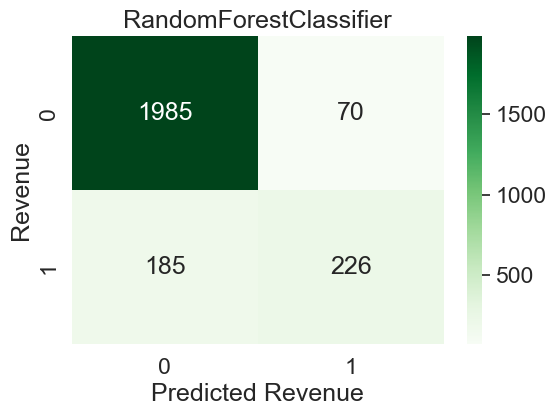

In [20]:
sns.set(font_scale= 1.5)
plt.figure(figsize= (6,4))
sns.heatmap(confusion_matrix(y_true= y_test, y_pred= rf_predictions), annot= True, cmap= 'Greens', fmt = 'g')
plt.xlabel('Predicted Revenue')
plt.ylabel('Revenue')
plt.title('RandomForestClassifier')

# Using K-Means classifier

In [21]:
# Apply K-means clustering
n_clusters = len(np.unique(y)) 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train)

# Assign labels based on the cluster centers
cluster_labels = kmeans.predict(X_train)

# Map cluster labels to class labels
label_mapping = {cluster: np.argmax(np.bincount(y_train[cluster_labels == cluster])) for cluster in np.unique(cluster_labels)}
predicted_labels = np.array([label_mapping[cluster] for cluster in cluster_labels])

# Predict on the test set
cluster_labels_test = kmeans.predict(X_test)
predicted_labels_test = np.array([label_mapping[cluster] for cluster in cluster_labels_test])


print("K means clustering:")
print("Accuracy:", accuracy_score(y_test, predicted_labels_test))
print("Classification Report:\n", classification_report(y_test, predicted_labels_test))



K means clustering:
Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      2055
           1       0.00      0.00      0.00       411

    accuracy                           0.83      2466
   macro avg       0.42      0.50      0.45      2466
weighted avg       0.69      0.83      0.76      2466



# Plotting K-means predicitons 

Text(0.5, 1.0, 'K means clustering with randon data split')

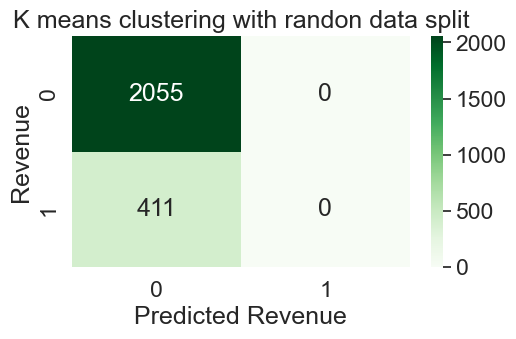

In [22]:
sns.set(font_scale= 1.5)
plt.figure(figsize= (12,3))
plt.subplot(1, 2 , 1)
sns.heatmap(confusion_matrix(y_true= y_test, y_pred= predicted_labels_test), annot= True, cmap= 'Greens', fmt = 'g')
plt.xlabel('Predicted Revenue')
plt.ylabel('Revenue')
plt.title('K means clustering with randon data split')

# train test split with k-means and accuracy

In [23]:
df = data.groupby('Revenue', group_keys=False).apply(lambda x: x.sample(1908))
df['Revenue'].value_counts()

X = df.drop('Revenue', axis=1)
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply K-means clustering
n_clusters = len(np.unique(y)) 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train)

# Assign labels based on the cluster centers
cluster_labels = kmeans.predict(X_train)

# Map cluster labels to class labels
label_mapping = {cluster: np.argmax(np.bincount(y_train[cluster_labels == cluster])) for cluster in np.unique(cluster_labels)}
predicted_labels = np.array([label_mapping[cluster] for cluster in cluster_labels])

# Predict on the test set
cluster_labels_test = kmeans.predict(X_test)
predicted_labels_test = np.array([label_mapping[cluster] for cluster in cluster_labels_test])


print("K means clustering:")
print("Accuracy:", accuracy_score(y_test, predicted_labels_test))
print("Classification Report:\n", classification_report(y_test, predicted_labels_test))


K means clustering:
Accuracy: 0.5235602094240838
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.92      0.66       391
           1       0.57      0.10      0.18       373

    accuracy                           0.52       764
   macro avg       0.54      0.51      0.42       764
weighted avg       0.54      0.52      0.43       764



# Plotting Modified Model Prediction

Text(0.5, 1.0, 'K means clustering with randon data split')

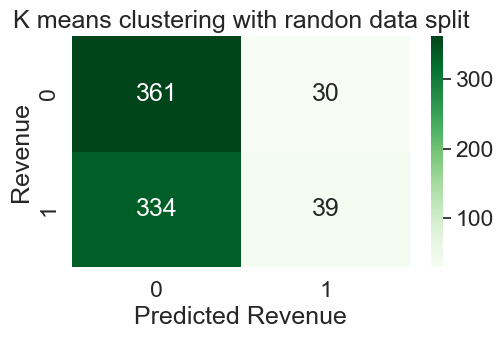

In [24]:
sns.set(font_scale= 1.5)
plt.figure(figsize= (12,3))
plt.subplot(1, 2 , 1)
sns.heatmap(confusion_matrix(y_true= y_test, y_pred= predicted_labels_test), annot= True, cmap= 'Greens', fmt = 'g')
plt.xlabel('Predicted Revenue')
plt.ylabel('Revenue')
plt.title('K means clustering with randon data split')

# Split the dataset into labeled and unlabeled portions

In [25]:
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

In [26]:
# Initialize the SelfTrainingClassifier with an SVC as the base classifier
self_training_classifier = SelfTrainingClassifier(SVC(probability=True, gamma=0.0),
                                                  criterion='k_best', k_best=50)

# Fit the self-training classifier on the initially labeled data
self_training_classifier.fit(X_labeled, y_labeled)

# Use the trained self-training classifier to make predictions on the unlabeled data
self_training_predictions = self_training_classifier.predict(X_unlabeled)

# Combine the initially labeled and newly predicted unlabeled data
X_combined = pd.concat([X_labeled, X_unlabeled])
y_combined = pd.concat([y_labeled, pd.Series(self_training_predictions, index=X_unlabeled.index)])

# Fit the self-training classifier on the combined labeled and unlabeled data
self_training_classifier.fit(X_combined, y_combined)

# Use the trained self-training classifier to make predictions on the test data
self_training_predictions_test = self_training_classifier.predict(X_test)

# Print the results
print("\nSelf-training Classifier:")
print("Accuracy:", accuracy_score(y_test, self_training_predictions_test))
print("Classification Report:\n", classification_report(y_test, self_training_predictions_test))




Self-training Classifier:
Accuracy: 0.4882198952879581
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       391
           1       0.49      1.00      0.66       373

    accuracy                           0.49       764
   macro avg       0.24      0.50      0.33       764
weighted avg       0.24      0.49      0.32       764



In [27]:
self_training_classifier_rfc = SelfTrainingClassifier(RandomForestClassifier(n_estimators=100, random_state=42),
                                                  criterion='k_best', k_best=50)
self_training_classifier_rfc.fit(X_labeled, y_labeled)
 
# Use the trained model to predict on the unlabeled data
self_training_predictions_rfc = self_training_classifier_rfc.predict(X_unlabeled)
 
# Combine the predictions with the original labels
X_combined = pd.concat([X_labeled, X_unlabeled])
y_combined = pd.concat([y_labeled, pd.Series(self_training_predictions_rfc, index=X_unlabeled.index)])
 
# Retrain the classifier on the combined labeled and pseudo-labeled data
self_training_classifier.fit(X_combined, y_combined)
 
# Predictions on the test set
self_training_predictions_test_rfc = self_training_classifier_rfc.predict(X_test)
 
# Evaluate the Self-training classifier
print("\nSelf-training Classifier:")
print("Accuracy:", accuracy_score(y_test, self_training_predictions_test_rfc))
print("Classification Report:\n", classification_report(y_test, self_training_predictions_test_rfc))


Self-training Classifier:
Accuracy: 0.8547120418848168
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       391
           1       0.85      0.85      0.85       373

    accuracy                           0.85       764
   macro avg       0.85      0.85      0.85       764
weighted avg       0.85      0.85      0.85       764




# plotting Semi Supervised SVM and Semi supervised RFC

Text(0.5, 1.0, 'Semi Supervised RFC')

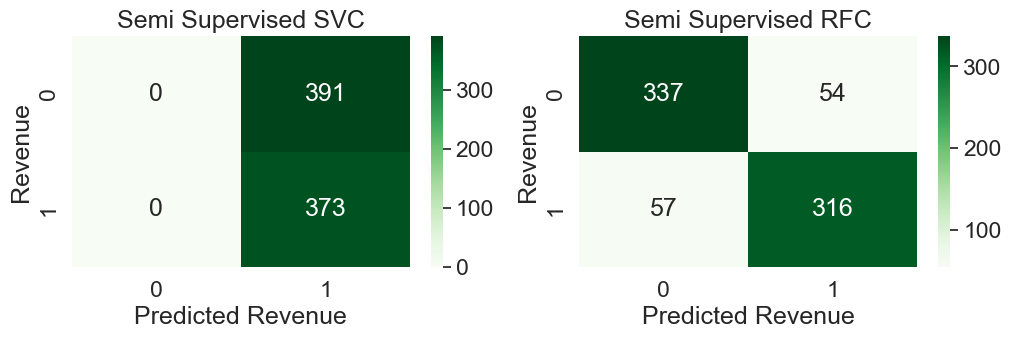

In [28]:

sns.set(font_scale= 1.5)
plt.figure(figsize= (12,3))
plt.subplot(1, 2 , 1)
sns.heatmap(confusion_matrix(y_true= y_test, y_pred= self_training_predictions_test), annot= True, cmap= 'Greens', fmt = 'g')
plt.xlabel('Predicted Revenue')
plt.ylabel('Revenue')
plt.title('Semi Supervised SVC')



plt.subplot(1, 2 , 2)
sns.heatmap(confusion_matrix(y_true= y_test, y_pred= self_training_predictions_test_rfc), annot= True, cmap= 'Greens', fmt = 'g')
plt.xlabel('Predicted Revenue')
plt.ylabel('Revenue')
plt.title('Semi Supervised RFC')